## Perturbative footprint study: footprints clustering

### Imports

In [1]:
# Import standard modules
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# Nicer style
import seaborn as sns
sns.set_theme(style="whitegrid")


### Load footprints and plot a sample

In [2]:
# Load l_fp
with open("output/l_fp.pkl", "rb") as f:
    l_fp = pickle.load(f)

# Load list of bunch numbers
with open("output/l_bunch_nb.pkl", "rb") as f:
    l_bunch_nb = pickle.load(f)

# Remove all nan footprints, along with bunch numbers
l_bunch_nb = [bunch_nb for i, bunch_nb in enumerate(l_bunch_nb) if not np.isnan(l_fp[i]).any()]
l_fp = [fp for fp in l_fp if not np.isnan(fp).any()]




### Remove outliers in each figure

In [3]:
# Look for outlier index in Qy distribution
l_qy = [fp[1] for fp in l_fp]
for i, qy in enumerate(l_qy):
    if np.min(qy) < 0.29:
        # Get outlier coordinates in 2D
        arg_outlier_flat = np.argmin(qy)
        print(f"Outlier found at index {i} (bunch {l_bunch_nb[i]}).")
        if i>80:
            break

# Clearly, there's a recurring outlier. Create a copy of fp where it's been replaced by nan
l_fp_no_outlier = [fp.copy() for fp in l_fp]
for i, fp in enumerate(l_fp_no_outlier):
    l_fp_no_outlier[i][0].flat[arg_outlier_flat] = np.nan
    l_fp_no_outlier[i][1].flat[arg_outlier_flat] = np.nan

Outlier found at index 30 (bunch 86).
Outlier found at index 31 (bunch 87).
Outlier found at index 32 (bunch 88).
Outlier found at index 33 (bunch 89).
Outlier found at index 34 (bunch 90).
Outlier found at index 38 (bunch 98).
Outlier found at index 39 (bunch 99).
Outlier found at index 40 (bunch 100).
Outlier found at index 41 (bunch 101).
Outlier found at index 42 (bunch 102).
Outlier found at index 46 (bunch 110).
Outlier found at index 47 (bunch 111).
Outlier found at index 48 (bunch 112).
Outlier found at index 49 (bunch 113).
Outlier found at index 50 (bunch 114).
Outlier found at index 56 (bunch 124).
Outlier found at index 57 (bunch 125).
Outlier found at index 86 (bunch 173).


### Get the DA for each footprint

In [4]:
# Load dataframe for DA
path = "/afs/cern.ch/work/c/cdroin/private/DA_study/master_study/opt_flathv_75_1500_withBB_chroma15_1p4_all_bunches"
df = pd.read_parquet(f"{path}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Get list of bunches and list of DA
l_bunch_nb_from_DA = df["bunch_nb"]
l_DA = df["normalized amplitude in xy-plane"]
dic_DA = {bunch_nb: DA for bunch_nb, DA in zip(l_bunch_nb_from_DA, l_DA)}

### Plot footprint by DA

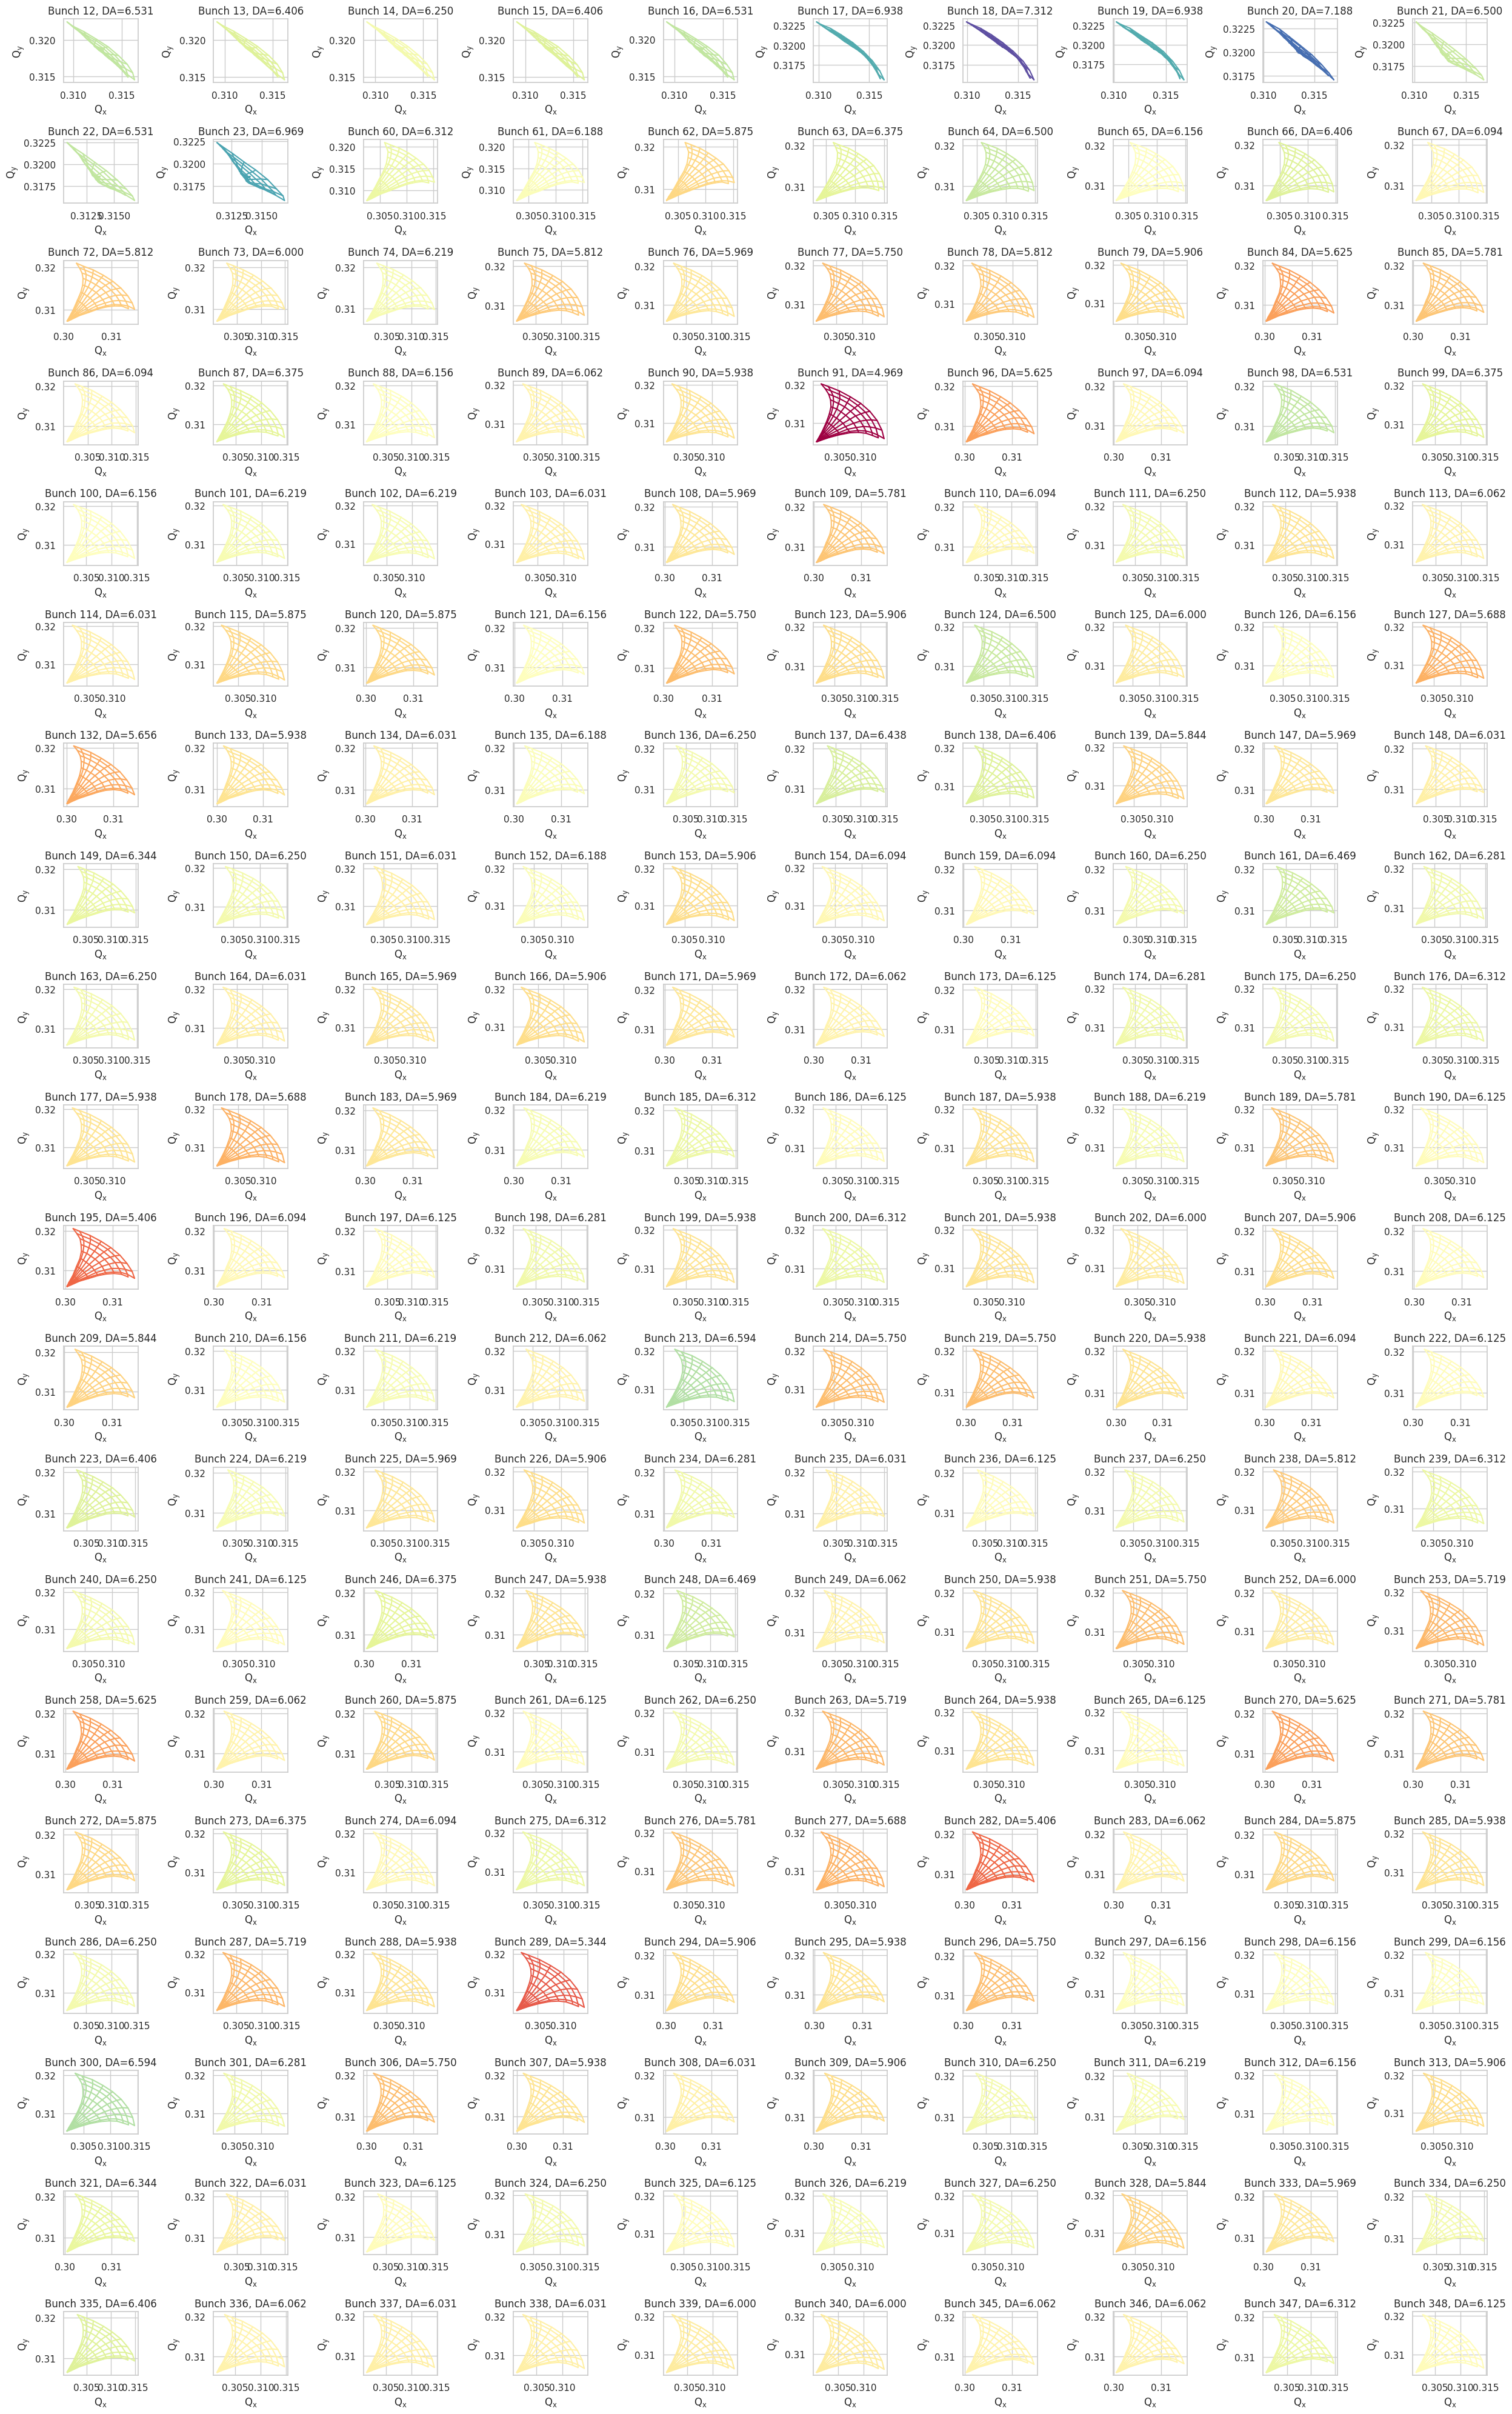

In [6]:
# Make a grid of plots for all the footprints
sample_nb = 200
n_cols = 10
n_rows = int(np.ceil(len(l_fp_no_outlier[:sample_nb])/n_cols))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*2.5, n_rows*2))

# Build a discrete colormap for DAs
min_DA = np.min(l_DA)
max_DA = np.max(l_DA)
discrete_cmap = sns.color_palette("Spectral", n_colors=256)
l_colors = [discrete_cmap[int((DA-min_DA)/(max_DA-min_DA)*255)] for DA in l_DA]
dic_colors = {bunch_nb: color for bunch_nb, color in zip(l_bunch_nb_from_DA, l_colors)}

for i, (bunch_nb, fp) in enumerate(zip(l_bunch_nb[:sample_nb], l_fp_no_outlier[:sample_nb])):
    try:
        ax = axs[i//n_cols, i%n_cols]
        ax.plot(fp[0], fp[1], color=dic_colors[l_bunch_nb[i]])
        ax.plot(fp[0].T, fp[1].T, color=dic_colors[l_bunch_nb[i]])
        ax.set_title(f"Bunch {l_bunch_nb[i]}, DA={dic_DA[l_bunch_nb[i]]:.3f}")
        ax.set_xlabel(r"$\mathrm{Q_x}$")
        ax.set_ylabel(r"$\mathrm{Q_y}$")
        #ax.set_aspect("equal")
        ax.set_xlim(np.min(fp[0])-0.01, np.max(fp[0])+0.01)
        ax.set_ylim(np.min(fp[1])-0.01, np.max(fp[1])+0.01)
        ax.set_title(f"Bunch {l_bunch_nb[i]}")
        ax.grid()
    except:
        pass

plt.tight_layout()
plt.show()

#